# Kaggle Titanic Solution

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import re
%matplotlib inline

### Import Train/Test Datasets; both are placed in the same folder as this notebook

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Check first 5 rows of the Train/Test dataset imported

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Check variables and missing value Train/Test

In [5]:
train.describe() #891 rows in Train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info() #891 rows in Train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test.describe() #418 rows in Test, test start from 892 onwards 

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Concatenate Train and Test & Check Missing Values

In [9]:
titanic = pd.concat([train,test], sort = False)
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### Check Missing Values using map

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


### Treat Age & Fare

In [11]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].median())
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [ ]:
#Age
titanic.loc[ titanic['Age'] <= 16, 'Age'] = 0
titanic.loc[(titanic['Age'] > 16) & (titanic['Age'] <= 32), 'Age'] = 1
titanic.loc[(titanic['Age'] > 32) & (titanic['Age'] <= 48), 'Age'] = 2
titanic.loc[(titanic['Age'] > 48) & (titanic['Age'] <= 64), 'Age'] = 3
titanic.loc[ titanic['Age'] > 64, 'Age'] = 4 ;

In [ ]:
# Mapping Fare
titanic.loc[ titanic['Fare'] <= 7.91, 'Fare'] = 0
titanic.loc[(titanic['Fare'] > 7.91) & (titanic['Fare'] <= 14.454), 'Fare'] = 1
titanic.loc[(titanic['Fare'] > 14.454) & (titanic['Fare'] <= 31), 'Fare']   = 2
titanic.loc[ titanic['Fare'] > 31, 'Fare'] = 3

### Treat Cabin

In [12]:
#Check how many missing values are there
#Numpy function is used to get count
np.count_nonzero(titanic['Cabin'].isnull())

1014

In [13]:
#Most cases are missing so we will fill it with 'Missing'
titanic['Cabin'] = titanic['Cabin'].fillna('Missing')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


### Treat Embarked

In [14]:
#Check where did most of the passengers Embarked from
titanic['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [15]:
#Use the idxmax to extra the index of a series who value is maximum
titanic['Embarked'].value_counts().idxmax()

'S'

In [16]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')
#Or directly in one line 
#titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].value_counts().idxmax())

In [17]:
#Check again
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [18]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.503186,0.498854,0.385027,33.281086
std,378.020061,0.486592,0.837836,12.905241,1.041658,0.865560,51.741500
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


# Creating Features

In [19]:
titanic['Cabin'] = titanic['Cabin'].str[0]
titanic['Cabin'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [20]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

titanic['IsAlone'] = 0
titanic.loc[titanic['FamilySize'] == 1, 'IsAlone'] = 1

In [21]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [22]:
titanic['Title'] = titanic['Name'].apply(get_title)

In [23]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,2,0,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,0,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,1,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,1,1,Mr


In [24]:
titanic['Title'] = titanic['Title'].replace(['Capt', 'Col','Dr', 'Major', 'Rev'], 'Officer')
titanic['Title'] = titanic['Title'].replace(['Lady', 'Countess','Don', 'Sir', 'Jonkheer', 'Dona'], 'Royalty')

In [25]:
titanic['Title'] = titanic['Title'].replace(['Mlle', 'Ms'], 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')

In [26]:
titanic['Title'].value_counts()

Mr         757
Miss       264
Mrs        198
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

In [27]:
def get_ticket(ticket):
    txt = ticket.replace("/","")
    txt = txt.replace(".","")
    txt = txt.upper()
    
    if txt.isdigit():
        return 'xxx'
    else:
        title_search = re.search(r'[A-Z]+[A-Z0-9]+|[A-Z]|[A-Za-z]', txt)
        # If the title exists, extract and return it.
        if title_search:
            return title_search.group(0)
        return ""

In [28]:
titanic['Ticket'] = titanic['Ticket'].apply(get_ticket)

In [29]:
titanic['Ticket'].value_counts()

xxx        957
PC          92
CA          68
A5          28
SOTONOQ     24
SCPARIS     19
WC          15
STONO       14
A4          10
FCC          9
SOC          8
C            8
SOPP         7
STONO2       7
SCAH         5
LINE         4
WEP          4
PP           4
SOTONO2      3
FC           3
SCA4         2
PPP          2
SWPP         2
SC           2
AS           1
SCA3         1
SCOW         1
LP           1
A            1
STONOQ       1
FA           1
CASOTON      1
AQ4          1
AQ3          1
SOP          1
SP           1
Name: Ticket, dtype: int64

In [30]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A5,7.2500,M,S,2,0,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC,71.2833,C,C,2,0,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STONO2,7.9250,M,S,1,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,xxx,53.1000,C,S,2,0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,xxx,8.0500,M,S,1,1,Mr


## Model 1 : Var for Model

In [32]:
titanic_all = titanic.drop(['PassengerId','Name','SibSp','Parch'],axis=1)

In [33]:
titanic_all.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,0.0,3,male,22.0,A5,7.2500,M,S,2,0,Mr
1,1.0,1,female,38.0,PC,71.2833,C,C,2,0,Mrs
2,1.0,3,female,26.0,STONO2,7.9250,M,S,1,1,Miss
3,1.0,1,female,35.0,xxx,53.1000,C,S,2,0,Mrs
4,0.0,3,male,35.0,xxx,8.0500,M,S,1,1,Mr


### Divide Dataset into train and test after cleaning missing values

In [35]:
titanic_dummies=pd.get_dummies(titanic_all, drop_first=True)
titanic_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 57 columns):
Survived          891 non-null float64
Pclass            1309 non-null int64
Age               1309 non-null float64
Fare              1309 non-null float64
FamilySize        1309 non-null int64
IsAlone           1309 non-null int64
Sex_male          1309 non-null uint8
Ticket_A4         1309 non-null uint8
Ticket_A5         1309 non-null uint8
Ticket_AQ3        1309 non-null uint8
Ticket_AQ4        1309 non-null uint8
Ticket_AS         1309 non-null uint8
Ticket_C          1309 non-null uint8
Ticket_CA         1309 non-null uint8
Ticket_CASOTON    1309 non-null uint8
Ticket_FA         1309 non-null uint8
Ticket_FC         1309 non-null uint8
Ticket_FCC        1309 non-null uint8
Ticket_LINE       1309 non-null uint8
Ticket_LP         1309 non-null uint8
Ticket_PC         1309 non-null uint8
Ticket_PP         1309 non-null uint8
Ticket_PPP        1309 non-null uint8
Ticket_SC      

In [36]:
#Get Train
t_train = titanic_dummies[titanic_dummies['Survived'].notnull()]
t_train.describe()

,Survived,Pclass,Age,Fare,FamilySize,IsAlone,Sex_male,Ticket_A4,Ticket_A5,Ticket_AQ3,...,Cabin_G,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,32.204208,1.904602,0.602694,0.647587,0.007856,0.023569,0.0,...,0.004489,0.771044,0.001122,0.086420,0.725028,0.207632,0.580247,0.141414,0.020202,0.005612
std,0.486592,0.836071,13.019697,49.693429,1.613459,0.489615,0.477990,0.088337,0.151787,0.0,...,0.066890,0.420397,0.033501,0.281141,0.446751,0.405840,0.493796,0.348644,0.140770,0.074743
min,0.000000,1.000000,0.420000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.910400,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,14.454200,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,31.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,3.000000,80.000000,512.329200,11.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
#Get Test
s_test = titanic_dummies[titanic_dummies['Survived'].isnull()]
s_test.describe()

,Survived,Pclass,Age,Fare,FamilySize,IsAlone,Sex_male,Ticket_A4,Ticket_A5,Ticket_AQ3,...,Cabin_G,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
count,0.0,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,...,418.000000,418.000000,418.0,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,NaN,2.265550,29.805024,35.576535,1.839713,0.605263,0.636364,0.007177,0.016746,0.002392,...,0.002392,0.782297,0.0,0.110048,0.645933,0.188995,0.574163,0.172249,0.011962,0.002392
std,NaN,0.841838,12.667969,55.850103,1.519072,0.489380,0.481622,0.084514,0.128474,0.048912,...,0.048912,0.413179,0.0,0.313324,0.478803,0.391974,0.495062,0.378049,0.108844,0.048912
min,NaN,1.000000,0.170000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.000000,23.000000,7.895800,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,3.000000,28.000000,14.454200,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,NaN,3.000000,35.750000,31.471875,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,NaN,3.000000,76.000000,512.329200,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
t_train.head()

,Survived,Pclass,Age,Fare,FamilySize,IsAlone,Sex_male,Ticket_A4,Ticket_A5,Ticket_AQ3,...,Cabin_G,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0.0,3,22.0,7.2500,2,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
1,1.0,1,38.0,71.2833,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,3,26.0,7.9250,1,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,1.0,1,35.0,53.1000,2,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0.0,3,35.0,8.0500,1,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [39]:
X = t_train.iloc[:,1:]
X.head()

,Pclass,Age,Fare,FamilySize,IsAlone,Sex_male,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,...,Cabin_G,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,22.0,7.2500,2,0,1,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
1,1,38.0,71.2833,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,26.0,7.9250,1,1,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,1,35.0,53.1000,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,3,35.0,8.0500,1,1,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [40]:
y = t_train['Survived']
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [41]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2, random_state = 200)

### DT

In [42]:
import sklearn.tree as tree
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)

In [43]:
mod=model_selection.GridSearchCV(clf,param_grid={'max_depth':[5,10,15,20,25,30,35,40,45,50,100,200,300,400]})
mod.fit(X_train,y_train)
mod.score(X_test,y_test)

C:\Users\fxnik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.7877094972067039

In [44]:
mod.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best')

In [46]:
mod.best_score_

0.8202247191011236

In [47]:
t_predictions = mod.predict(s_test.iloc[:,1:])
#t_predictions

In [48]:
#Get Passender ID from Test
PassengerId = test['PassengerId']
#PassengerId

In [49]:
# Generate Submission File 
NumSubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': t_predictions })
NumSubmission.to_csv("NumSubmission_with_all_DT_best.csv", index=False)

### Logistic Regression

In [ ]:
#Import libraries
from sklearn.linear_model import LogisticRegression

In [ ]:
#Build model
logreg = LogisticRegression()
logreg.fit( X_train, y_train)
#Ravel is used to convert to a single 1D array | https://www.geeksforgeeks.org/numpy-ravel-python/

In [ ]:
logreg.score(X_test,y_test)

In [ ]:
t_predictions = logreg.predict(X_test)
t_predictions

## Evaluation on test

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,t_predictions))

## Prediction for Submission test 

In [ ]:
t_predictions = logreg.predict(s_test.iloc[:,1:])
t_predictions

In [ ]:
#Get Passender ID from Test
PassengerId = test['PassengerId']
PassengerId

In [ ]:
# Generate Submission File 
NumSubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': t_predictions })
NumSubmission.to_csv("NumSubmission_with_all_Logistic.csv", index=False)

# BaggingClassifier

In [57]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [58]:
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
                      base_estimator=DecisionTreeClassifier())

In [59]:
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [60]:
clf.oob_score_

0.8146067415730337

In [61]:
clf.score(X_test,y_test)

0.7541899441340782

In [64]:
for m in range(1,5,1):
    for w in range(10,300,20):
        clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,max_features=m,
                              base_estimator=DecisionTreeClassifier())
        clf.fit(X_train,y_train)
        oob=clf.oob_score_
        print ('For n_estimators = '+str(w))
        print ('OOB score is '+str(oob))
        print ('************************')

C:\Users\fxnik\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:606: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\fxnik\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:611: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.6207865168539326
************************
For n_estimators = 30
OOB score is 0.6235955056179775
************************
For n_estimators = 50
OOB score is 0.625
************************
For n_estimators = 70
OOB score is 0.625
************************
For n_estimators = 90
OOB score is 0.625
************************
For n_estimators = 110
OOB score is 0.625
************************
For n_estimators = 130
OOB score is 0.625
************************
For n_estimators = 150
OOB score is 0.625
************************
For n_estimators = 170
OOB score is 0.625
************************
For n_estimators = 190
OOB score is 0.625
************************
For n_estimators = 210
OOB score is 0.625
************************
For n_estimators = 230
OOB score is 0.625
************************
For n_estimators = 250
OOB score is 0.625
************************
For n_estimators = 270
OOB score is 0.625
************************
For n_estimators = 290
OOB score is 0.625

C:\Users\fxnik\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:606: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\fxnik\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:611: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


For n_estimators = 90
OOB score is 0.6306179775280899
************************
For n_estimators = 110
OOB score is 0.6306179775280899
************************
For n_estimators = 130
OOB score is 0.6278089887640449
************************
For n_estimators = 150
OOB score is 0.6278089887640449
************************
For n_estimators = 170
OOB score is 0.6264044943820225
************************
For n_estimators = 190
OOB score is 0.6264044943820225
************************
For n_estimators = 210
OOB score is 0.6264044943820225
************************
For n_estimators = 230
OOB score is 0.6264044943820225
************************
For n_estimators = 250
OOB score is 0.625
************************
For n_estimators = 270
OOB score is 0.625
************************
For n_estimators = 290
OOB score is 0.625
************************
For n_estimators = 10
OOB score is 0.6573033707865169
************************
For n_estimators = 30
OOB score is 0.6713483146067416
************************
Fo

C:\Users\fxnik\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:606: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\fxnik\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:611: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


For n_estimators = 90
OOB score is 0.6685393258426966
************************
For n_estimators = 110
OOB score is 0.6601123595505618
************************
For n_estimators = 130
OOB score is 0.6643258426966292
************************
For n_estimators = 150
OOB score is 0.6601123595505618
************************
For n_estimators = 170
OOB score is 0.6587078651685393
************************
For n_estimators = 190
OOB score is 0.648876404494382
************************
For n_estimators = 210
OOB score is 0.6629213483146067
************************
For n_estimators = 230
OOB score is 0.6671348314606742
************************
For n_estimators = 250
OOB score is 0.6657303370786517
************************
For n_estimators = 270
OOB score is 0.6573033707865169
************************
For n_estimators = 290
OOB score is 0.6657303370786517
************************
For n_estimators = 10
OOB score is 0.6601123595505618
************************
For n_estimators = 30
OOB score is 0.671348

C:\Users\fxnik\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:606: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\fxnik\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:611: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


For n_estimators = 90
OOB score is 0.6952247191011236
************************
For n_estimators = 110
OOB score is 0.7064606741573034
************************
For n_estimators = 130
OOB score is 0.6966292134831461
************************
For n_estimators = 150
OOB score is 0.7008426966292135
************************
For n_estimators = 170
OOB score is 0.6980337078651685
************************
For n_estimators = 190
OOB score is 0.6882022471910112
************************
For n_estimators = 210
OOB score is 0.6882022471910112
************************
For n_estimators = 230
OOB score is 0.6980337078651685
************************
For n_estimators = 250
OOB score is 0.7050561797752809
************************
For n_estimators = 270
OOB score is 0.6966292134831461
************************
For n_estimators = 290
OOB score is 0.7036516853932584
************************


In [65]:
#130
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=50,random_state=200,
                      base_estimator=DecisionTreeClassifier())

In [66]:
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=-1, oob_score=True,
         random_state=200, verbose=0, warm_start=False)

In [67]:
clf.oob_score_

0.8342696629213483

In [68]:
clf.score(X_test,y_test)

0.776536312849162

In [69]:
print (clf.estimators_[0].feature_importances_)

[0.08490265 0.2105073  0.19472208 0.04546753 0.00228065 0.
 0.         0.0029788  0.         0.         0.         0.
 0.00729807 0.         0.         0.         0.         0.
 0.         0.00955699 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00559988 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.0170815  0.00409585
 0.00858322 0.00307189 0.01195698 0.         0.         0.00078991
 0.         0.00307189 0.01867531 0.01565201 0.32515348 0.00184313
 0.02671086 0.        ]


In [70]:
# We can extract feature importance from each tree then take a mean for all trees
imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp=np.mean(imp,axis=0)

In [71]:
feature_importance=pd.Series(imp,index=X.columns.tolist())

In [72]:
feature_importance.sort_values(ascending=False)

Title_Mr          0.274585
Age               0.177623
Fare              0.169975
FamilySize        0.085330
Pclass            0.068843
Sex_male          0.067749
Title_Officer     0.019368
Embarked_S        0.017887
Cabin_M           0.017315
Cabin_E           0.013985
Ticket_xxx        0.011198
IsAlone           0.007824
Cabin_D           0.007788
Cabin_C           0.007217
Ticket_STONO      0.006474
Embarked_Q        0.006340
Title_Mrs         0.004972
Ticket_SOPP       0.004690
Ticket_A5         0.004319
Ticket_SOTONOQ    0.004104
Title_Miss        0.003459
Ticket_WC         0.003173
Ticket_C          0.002884
Cabin_B           0.002674
Cabin_G           0.002160
Ticket_CA         0.001821
Ticket_PC         0.001387
Cabin_F           0.001326
Ticket_STONO2     0.000925
Ticket_SCPARIS    0.000614
Ticket_WEP        0.000595
Ticket_SOC        0.000366
Title_Royalty     0.000342
Ticket_FCC        0.000204
Ticket_CASOTON    0.000184
Ticket_FC         0.000118
Ticket_SCAH       0.000103
C

In [73]:
predictions_clf = clf.predict(s_test.iloc[:,1:])

In [74]:
# Generate Submission File 
NumSubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': predictions_clf })
NumSubmission.to_csv("NumSubmission_with_all_Bagging.csv", index=False)

# Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)

In [77]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=True, random_state=400, verbose=0, warm_start=False)

In [78]:
rf.oob_score_

0.8328651685393258

In [ ]:
imp_feat[imp_feat>0.01].sort_values(ascending=False).plot(kind='bar')

In [ ]:
predictions_rf = rf.predict(s_test.iloc[:,1:])

In [ ]:
# Generate Submission File 
NumSubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': predictions_rf })
NumSubmission.to_csv("NumSubmission_with_all_RF.csv", index=False)

# RF Grid Search

In [80]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [81]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 42, 74, 106, 138, 171, 203, 235, 267, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [82]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   27.2s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 42, 74, 106, 138, 171, 203, 235, 267, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [83]:
rf_random.best_params_

{'n_estimators': 267,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [ ]:
#X_train_lim = X_train[['Age', 'Fare', 'Title_Mr', 'Sex_male', 'FamilySize', 'Pclass', 'Title_Miss', 'Embarked_S', 'IsAlone', 'Ticket_xxx', 'Cabin_E']]

In [87]:
#Finalize using best
rf=RandomForestClassifier(n_estimators=267,oob_score=True,n_jobs=-1,random_state=200, min_samples_split = 10, min_samples_leaf = 1, max_features = 'sqrt', bootstrap = True, max_depth =30 )

In [88]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=267, n_jobs=-1,
            oob_score=True, random_state=200, verbose=0, warm_start=False)

In [89]:
rf.oob_score_

0.8342696629213483

In [90]:
rf.feature_importances_

array([7.92666090e-02, 1.10275146e-01, 1.43173844e-01, 6.58742942e-02,
       1.43762904e-02, 1.41598658e-01, 3.46324590e-04, 3.74039014e-03,
       0.00000000e+00, 0.00000000e+00, 3.50923798e-05, 3.04260641e-03,
       3.89900998e-03, 5.70332134e-05, 3.43572638e-05, 4.29832892e-04,
       1.23740192e-03, 6.39244481e-05, 0.00000000e+00, 6.77179694e-03,
       3.27651037e-04, 2.40325096e-04, 1.76860542e-04, 0.00000000e+00,
       0.00000000e+00, 4.01824546e-04, 0.00000000e+00, 9.23223933e-04,
       9.68990157e-04, 2.95632902e-04, 1.27023295e-03, 9.73068920e-05,
       3.06265408e-03, 3.40912008e-05, 5.63017176e-03, 2.06472739e-03,
       0.00000000e+00, 0.00000000e+00, 4.07508239e-03, 8.27634392e-04,
       1.01592057e-02, 6.21941391e-03, 5.92842812e-03, 7.62532901e-03,
       1.44006640e-02, 2.15779529e-03, 2.14889729e-03, 3.79170244e-02,
       6.12206568e-04, 9.05659758e-03, 1.88485416e-02, 6.84536596e-02,
       1.77200579e-01, 3.46703159e-02, 8.75549164e-03, 1.22682981e-03])

In [91]:
imp_feat=pd.Series(rf.feature_importances_,index=X.columns.tolist())

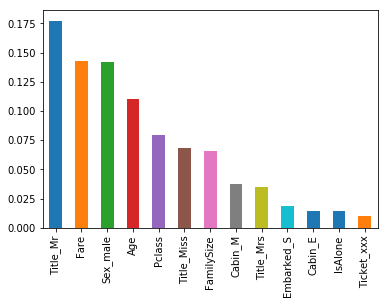

In [92]:
imp_feat.sort_values(ascending=False)
imp_feat[imp_feat>0.01].sort_values(ascending=False).plot(kind='bar')

In [93]:
predictions_rf = rf.predict(s_test.iloc[:,1:])
#predictions_rf = rf.predict(s_test[['Age', 'Fare', 'Title_Mr', 'Sex_male', 'FamilySize', 'Pclass', 'Title_Miss', 'Embarked_S', 'IsAlone', 'Ticket_xxx', 'Cabin_E']])

In [94]:
# Generate Submission File 
NumSubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': predictions_rf })
NumSubmission.to_csv("NumSubmission_with_all_RF_GS.csv", index=False)